In [3]:
!pip install yfinance scikit-learn matplotlib

In [22]:
#Import libraries

import yfinance as yf #For fetching stock data
import pandas as pd #For data manipilation
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import classification_report #For evaluating model performance
import matplotlib.pyplot as plt # For visualization
from sklearn.metrics import mean_squared_error #For evaluating model performance
import tkinter as tk
from tkinter import messagebox

In [13]:
#Step 1: Ftech Ticker data from Yahoo Finance
def fetch_ticker_data(ticker, start_date, end_date):
  data = yf.download(ticker,start=start_date, end=end_date)
  data['5d_avg'] = data['Close'].rolling(window=5).mean()
  data['10d_avg'] = data['Close'].rolling(window=10).mean()
  data['Volume_Change'] = data['Volume'].pct_change()
  data['Target'] = data['Close'].shift(-1)
  data.dropna(inplace=True)
  return data

In [8]:
# Step 2: Prepare Features and Target
def prepare_data(data):
    features = ['5d_avg', '10d_avg', 'Volume_Change']
    X = data[features].values
    y = data['Target'].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 3: Train Models
def train_models(X_train, y_train):
    # Ridge Regression
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)

    # Lasso Regression
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)

    # SVR
    svr = SVR(kernel='rbf', C=100, epsilon=1.0)
    svr.fit(X_train, y_train)

    return ridge, lasso, svr

In [17]:
# Step 4: Predict and Evaluate
def predict_and_evaluate(models, X_test, y_test):
    ridge, lasso, svr = models

    # Predictions
    y_pred_ridge = ridge.predict(X_test)
    y_pred_lasso = lasso.predict(X_test)
    y_pred_svr = svr.predict(X_test)

    # Evaluation
    print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
    print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
    print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))

    return y_pred_ridge, y_pred_lasso, y_pred_svr

In [11]:
# Step 5: Visualize Predictions
def visualize_predictions(y_test, y_pred_ridge, y_pred_lasso, y_pred_svr):
    plt.figure(figsize=(14, 7))
    plt.plot(y_test, label="True Prices", color="blue", alpha=0.6)
    plt.plot(y_pred_ridge, label="Ridge Predictions", color="green", linestyle="--")
    plt.plot(y_pred_lasso, label="Lasso Predictions", color="orange", linestyle="--")
    plt.plot(y_pred_svr, label="SVR Predictions", color="red", linestyle="--")
    plt.legend()
    plt.title("True vs Predicted Prices (Ridge, Lasso, SVR)")
    plt.xlabel("Test Samples")
    plt.ylabel("Price")
    plt.show()

[*********************100%***********************]  1 of 1 completed


Ridge MSE: 0.693705635032991
Lasso MSE: 0.6995944303071446
SVR MSE: 0.7237287342183206


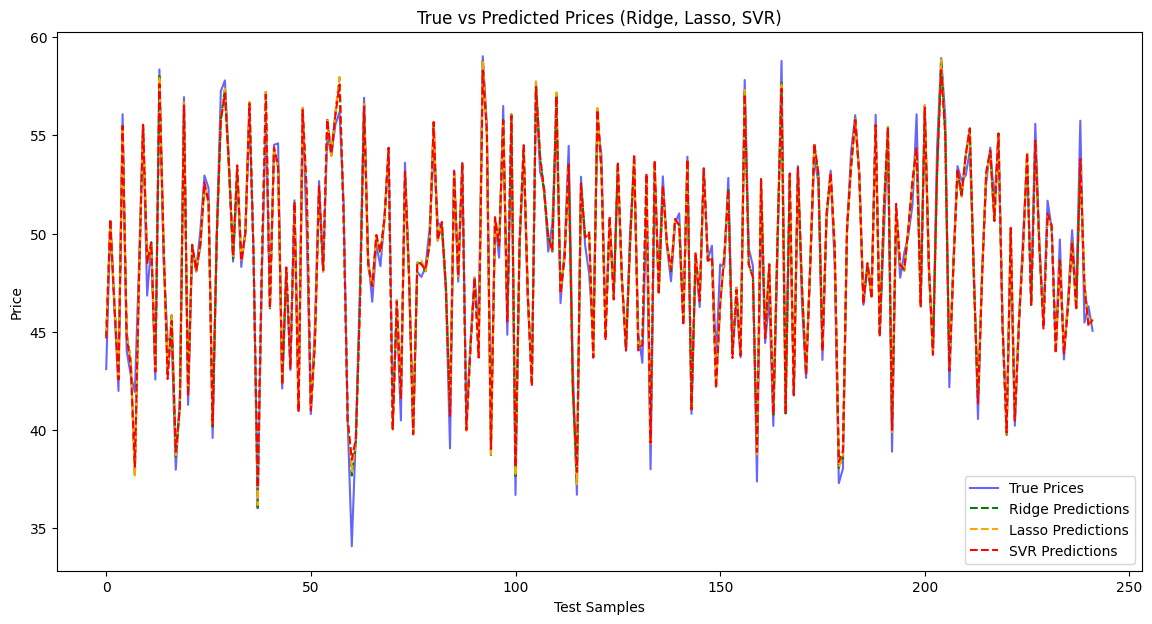

Predicted Tomorrow's Price (Ridge): $57.42
Predicted Tomorrow's Price (Lasso): $57.40
Predicted Tomorrow's Price (SVR): $57.15


In [20]:
# Main Script
if __name__ == "__main__":
    ticker = "ENB.TO"  # Replace with desired ticker
    start_date = "2020-01-01"
    end_date = "2024-11-10"

    # Fetch and prepare data
    stock_data = fetch_ticker_data(ticker, start_date, end_date)
    X_train, X_test, y_train, y_test = prepare_data(stock_data)

    # Train models
    models = train_models(X_train, y_train)

    # Predict and evaluate
    y_pred_ridge, y_pred_lasso, y_pred_svr = predict_and_evaluate(models, X_test, y_test)

    # Visualize results
    visualize_predictions(y_test, y_pred_ridge, y_pred_lasso, y_pred_svr)

    # Predict tomorrow's price using today's data
    last_row = stock_data.iloc[-1][['5d_avg', '10d_avg', 'Volume_Change']].values.reshape(1, -1)
    tomorrow_ridge = models[0].predict(last_row)[0]
    tomorrow_lasso = models[1].predict(last_row)[0]
    tomorrow_svr = models[2].predict(last_row)[0]

    print(f"Predicted Tomorrow's Price (Ridge): ${tomorrow_ridge:.2f}")
    print(f"Predicted Tomorrow's Price (Lasso): ${tomorrow_lasso:.2f}")
    print(f"Predicted Tomorrow's Price (SVR): ${tomorrow_svr:.2f}")

In [21]:
pip freeze > /content/drive/MyDrive/github_projects/stock_price_trend_predictor/requirements.txt